In [27]:
from pts.model.deepar import DeepAREstimator
from pts.dataset import ListDataset
from pts import Trainer
from pts.dataset import to_pandas
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [20]:
url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realTweets/Twitter_volume_AMZN.csv"
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)

In [21]:
df

,value
timestamp,
2015-02-26 21:42:53,57
2015-02-26 21:47:53,43
2015-02-26 21:52:53,55
2015-02-26 21:57:53,64
2015-02-26 22:02:53,93
...,...
2015-04-22 20:32:53,51
2015-04-22 20:37:53,54
2015-04-22 20:42:53,46


In [4]:
data = pd.read_csv('CryptoTrade/data/BTCUSDT-1h-data.csv')

In [6]:
data.set_index('timestamp', inplace=True)

In [15]:
training_data = ListDataset(
    [{"start": data.index[0], "target": data.close[:"2021-01-01 00:00:00"]}],
    freq = "1H"
)

In [25]:
estimator = DeepAREstimator(freq="1H",
                            prediction_length=12,
                            input_size=48,
                            trainer=Trainer(epochs=10,
                                            device='cpu'))
predictor = estimator.train(training_data=training_data)

49it [00:26,  1.83it/s, avg_epoch_loss=9.38, epoch=0]
49it [00:25,  1.91it/s, avg_epoch_loss=8.33, epoch=1]
49it [00:26,  1.82it/s, avg_epoch_loss=7.99, epoch=2]
49it [00:25,  1.89it/s, avg_epoch_loss=7.67, epoch=3]
49it [00:25,  1.89it/s, avg_epoch_loss=7.57, epoch=4]
49it [00:25,  1.89it/s, avg_epoch_loss=7.37, epoch=5]
49it [00:26,  1.85it/s, avg_epoch_loss=7.2, epoch=6] 
49it [00:25,  1.91it/s, avg_epoch_loss=7.1, epoch=7] 
49it [00:25,  1.92it/s, avg_epoch_loss=7.11, epoch=8]
49it [00:25,  1.93it/s, avg_epoch_loss=6.99, epoch=9]


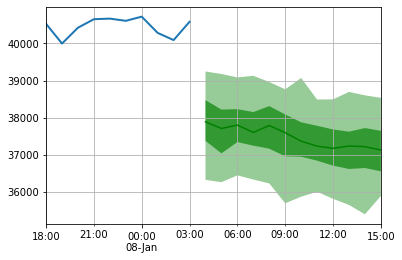

In [40]:
test_data = ListDataset(
    [{"start": data.index[0], "target": data.close[:"2021-01-10 00:00:00"]}],
    freq = "1H"
)

for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    to_pandas(test_entry)[-10:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0])
plt.grid(which='both')

/Users/guidosidoni/opt/anaconda3/envs/CryptoTrade/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='timestamp'>

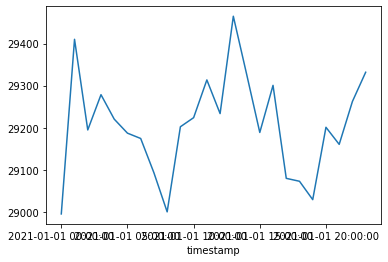

In [34]:
data.close['2021-01-01':'2021-01-02'].plot()